In [2]:
import numpy as np
import pandas as pd
import random as rd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "drive/My Drive/TubesML/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
csvfitur.csv  xlsfitur1.xlsx  xlsfitur2.xlsx  xlsfitur_cek.xlsx  xlsfitur.xlsx


In [0]:
dataset = pd.read_excel('/content/drive/My Drive/TubesML/xlsfitur1.xlsx')

In [5]:
dataset.head()

,age,height_cm,weight_kg
0,32,170,72
1,34,187,83
2,27,175,68
3,26,188,87
4,28,175,74


In [6]:
#MELIHAT BANYAKNYA MISSING VALUE
dataset.isnull().sum()

age          0
height_cm    0
weight_kg    0
dtype: int64

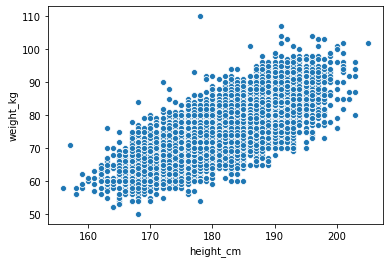

In [7]:
#MELIHAT BENTUK DATA
sns.scatterplot(x = 'height_cm', y = 'weight_kg' , data = dataset)

In [0]:
Dataset= dataset.iloc[:,[1,2]].values



In [9]:
Dataset.shape

(18278, 2)

In [10]:
print(Dataset)

[[170  72]
 [187  83]
 [175  68]
 ...
 [186  75]
 [185  74]
 [182  78]]


In [0]:
 #MENGAMBIL NILAI BANYAKNYA DATA
 data = Dataset.shape[0]

In [0]:
#INISIALISASI BANYAKNYA KLUSTER
K=3

In [13]:
#MEMBUAT ARRAY CENTROID
Centroids = np.array([[0,0],[0,0],[0,0]])
Centroids.shape

(3, 2)

In [14]:
#INISIALISASI CENTROID DARI NILAI DATA YANG SUDAH ADA
for i in range(K):
    random=rd.randint(0,data-1)
    Centroids[i][0]=Dataset[random][0]
    Centroids[i][1]= Dataset[random][1]
print(Centroids)

[[183  75]
 [184  83]
 [182  79]]


In [15]:
new_Centroids = np.array([[0,0],[0,0],[0,0]])
C0=[]
C1=[]
C2=[]
ED=[]
o  = 0
while (new_Centroids.all() != Centroids.all()):
  sum_C0_x = 0
  sum_C1_x = 0
  sum_C2_x = 0
  sum_C0_y = 0
  sum_C1_y = 0
  sum_C2_y = 0
  for i in range (data):
    #MENGHITUNG EUCLIDEAN DISTANCE
    ED0 = math.sqrt(pow(Dataset[i][0] - Centroids[0][0],2) + pow(Dataset[i][1] - Centroids[0][1],2))
    ED1 = math.sqrt(pow(Dataset[i][0] - Centroids[1][0],2) + pow(Dataset[i][1] - Centroids[1][1],2))
    ED2 = math.sqrt(pow(Dataset[i][0] - Centroids[2][0],2) + pow(Dataset[i][1] - Centroids[2][1],2))

    #MEMBANDINGKAN SETIAP EUCLIDEAN DISTANCE DAN MENYIMPAN INDEX  PADA SETIAP CLUSTER
    if (ED0 <= ED1) and (ED0 <= ED2):
      C0.append(i)
    elif (ED1 <= ED2):
      C1.append(i)
    else:
      C2.append(i)
  #MEMBUAT CENTROID BARU
  for i in range (len(C0)):
    sum_C0_x += Dataset[C0[i]][0]
    sum_C0_y += Dataset[C0[i]][1]
    new_Centroids[0][0]= (sum_C0_x ) / (i+1)
    new_Centroids[0][1]= (sum_C0_y ) / (i+1)
  for i in range (len(C1)):
    sum_C1_x += Dataset[C1[i]][0]
    sum_C1_y += Dataset[C1[i]][1]
    new_Centroids[1][0]= (sum_C1_x ) / (i+1)
    new_Centroids[1][1]= (sum_C1_y ) / (i+1)
  for i in range (len(C2)):
    sum_C2_x += Dataset[C2[i]][0]
    sum_C2_y += Dataset[C2[i]][1]
    new_Centroids[2][0]= (sum_C2_x) / (i+1)
    new_Centroids[2][1]= (sum_C2_y) / (i+1)
  Comp = new_Centroids == Centroids
  
 #MEMBANDINGAN CENTROID LAMA DENGAN YANG BARU
  if (Comp.all()):
    Centroids = new_Centroids
  else:
    Centroids = new_Centroids
    new_Centroids = np.array([[0,0],[0,0],[0,0]])
    C0.clear()
    C1.clear()
    C2.clear()
    
print("0:",len(C0))
print("1:",len(C1))
print("2:",len(C2))

0: 4592
1: 6475
2: 7211


In [0]:
Dataset = pd.DataFrame(dataset,columns = ['height_cm', 'weight_kg','cluster'])
cluster = []
#MEMBUAT KOLOM CLUSTER
for i in range (len(Dataset['weight_kg'])):
  cluster.append(-1)
Dataset['cluster'] = cluster

In [0]:
#INISIALISASI NILAI CLUSTER 
for i in range (len(C0)):
  cluster[C0[i]] = 0
for i in range (len(C1)):
  cluster[C1[i]] = 1
for i in range (len(C2)):
  cluster[C2[i]] = 2

  

In [18]:
print(Centroids)

[[173  67]
 [188  82]
 [180  74]]


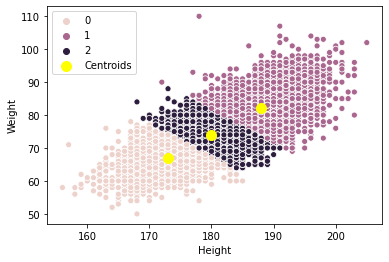

In [19]:
#MENAMPILKAN DATA BERDASARKAN FIGUR
sns.scatterplot(x = 'height_cm', y = 'weight_kg' , data = Dataset, hue =cluster)
plt.scatter(Centroids[:,0],Centroids[:,1],s=100,c='yellow',label='Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [20]:
#MENGHITUNG SSE
height = Dataset['height_cm']
weight = Dataset['weight_kg']
SSE0 = 0
SSE1 = 0
SSE2 = 0
for i in range(len(C0)):
  SSE0 += pow(Centroids[0][0] - height[C0[i]],2) + pow(Centroids[0][1] - weight[C0[i]],2)
for i in range(len(C1)):
  SSE1 += pow(Centroids[1][0] - height[C1[i]],2) + pow(Centroids[1][1] - weight[C1[i]],2) 
for i in range(len(C2)):
  SSE2 += pow(Centroids[2][0] - height[C2[i]],2) + pow(Centroids[2][1] - weight[C2[i]],2)   
SSE = SSE0+SSE1+SSE2
print("SSE: ",SSE)

SSE:  490321
